In [24]:
### Code taken from skl confusion matrix tutorial: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import sys, os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix, classification_report

# if len(argv) != 2:
#     sys.stderr.write("\nUsage: test_classifier.py [pickle file name]\n")
#     sys.exit()
    
# classifierPickleFileName = argv[1]

Testing the best classifier, printing confusion matrix


In [19]:
### Plot the confusion matrix for the best parameters
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

['setosa' 'versicolor' 'virginica']


# Simple Oversampling
For the data this classifier, I used RandomOverSampler to oversample MT=sweep_R=neutral and MT=delet_R=BS so that
each class would have 500 examples. For the rest of the classes, 1000 random (unique) samples were used.

Stats from 3 best examples in grid search:

Results for extraTreesClassifier

Model with rank: 1

Mean validation score: 0.744 (std: 0.035)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


Model with rank: 2

Mean validation score: 0.743 (std: 0.022)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


Model with rank: 3

Mean validation score: 0.742 (std: 0.027)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None}

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[204  12   0  15   1   6  11]
 [ 15 116   0  13   2  18  89]
 [  0   0  11   0   1   0   0]
 [  8   5   0 231   1   3   4]
 [  2   5   1   2 223   4  15]
 [ 11  28   0   6   1  13  29]
 [  9  87   1  11   6  14 126]]


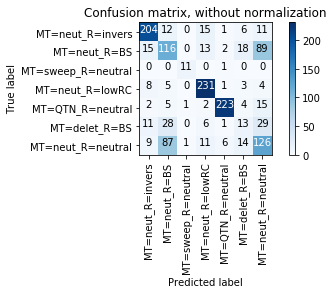

Normalized confusion matrix
[[0.82 0.05 0.   0.06 0.   0.02 0.04]
 [0.06 0.46 0.   0.05 0.01 0.07 0.35]
 [0.   0.   0.92 0.   0.08 0.   0.  ]
 [0.03 0.02 0.   0.92 0.   0.01 0.02]
 [0.01 0.02 0.   0.01 0.88 0.02 0.06]
 [0.12 0.32 0.   0.07 0.01 0.15 0.33]
 [0.04 0.34 0.   0.04 0.02 0.06 0.5 ]]


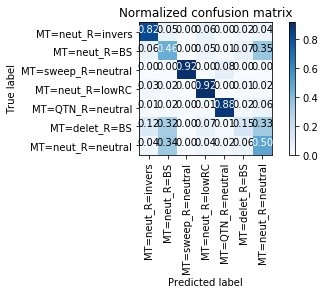

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.95      0.88      0.92       252
     MT=delet_R=BS       0.22      0.15      0.18        88
      MT=neut_R=BS       0.46      0.46      0.46       253
  MT=neut_R=invers       0.82      0.82      0.82       249
   MT=neut_R=lowRC       0.83      0.92      0.87       252
 MT=neut_R=neutral       0.46      0.50      0.48       254
MT=sweep_R=neutral       0.85      0.92      0.88        12

       avg / total       0.67      0.68      0.67      1360



In [28]:
classifierPickleFileName = "ScaleAcrossGenomeUnderAndOverSample.p"
X_test, y_test, grid_search = joblib.load(classifierPickleFileName)


sys.stderr.write("Testing the best classifier, printing confusion matrix\n")
                 
y_pred = grid_search.predict(X_test)
class_names = ['MT=neut_R=invers',
               'MT=neut_R=BS',
               'MT=sweep_R=neutral',
               'MT=neut_R=lowRC',
               'MT=QTN_R=neutral',
               'MT=delet_R=BS',
               'MT=neut_R=neutral']
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()
             
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=True,
                      title='Normalized confusion matrix')
plt.show()

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.95      0.88      0.92       252
     MT=delet_R=BS       0.22      0.15      0.18        88
      MT=neut_R=BS       0.46      0.46      0.46       253
  MT=neut_R=invers       0.82      0.82      0.82       249
   MT=neut_R=lowRC       0.83      0.92      0.87       252
 MT=neut_R=neutral       0.46      0.50      0.48       254
MT=sweep_R=neutral       0.85      0.92      0.88        12

       avg / total       0.67      0.68      0.67      1360



# Synthetic Samples with SMOTE

For the data for this classifier, I used the SMOTE algorithm to generate synthetic data points for each class that has less examples than the class with the most examples. This was after selecting only 1000 examples from the classes that had over 1000 examples.

Stats from the grid search: 

Results for extraTreesClassifier

Model with rank: 1

Mean validation score: 0.751 (std: 0.019)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None}


Model with rank: 2

Mean validation score: 0.748 (std: 0.015)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


Model with rank: 3

Mean validation score: 0.747 (std: 0.020)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 9, 'max_depth': None}"


Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[189  17   0  10   2  21  10]
 [  7 107   0  15   3  53  68]
 [  0   0  11   0   1   0   0]
 [  3   2   0 243   0   3   1]
 [  1   9   1   2 215   6  18]
 [  6  31   0   7   1  23  20]
 [  9  87   1   8   6  31 112]]


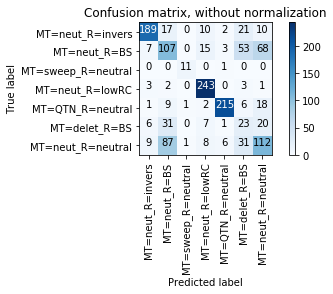

Normalized confusion matrix
[[0.76 0.07 0.   0.04 0.01 0.08 0.04]
 [0.03 0.42 0.   0.06 0.01 0.21 0.27]
 [0.   0.   0.92 0.   0.08 0.   0.  ]
 [0.01 0.01 0.   0.96 0.   0.01 0.  ]
 [0.   0.04 0.   0.01 0.85 0.02 0.07]
 [0.07 0.35 0.   0.08 0.01 0.26 0.23]
 [0.04 0.34 0.   0.03 0.02 0.12 0.44]]


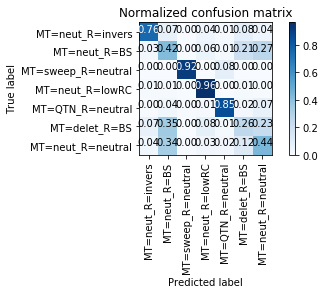

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.94      0.85      0.90       252
     MT=delet_R=BS       0.17      0.26      0.20        88
      MT=neut_R=BS       0.42      0.42      0.42       253
  MT=neut_R=invers       0.88      0.76      0.81       249
   MT=neut_R=lowRC       0.85      0.96      0.91       252
 MT=neut_R=neutral       0.49      0.44      0.46       254
MT=sweep_R=neutral       0.85      0.92      0.88        12

       avg / total       0.68      0.66      0.67      1360



In [27]:
classifierPickleFileName = "clfAcrossGenomeSMOTE1000.p"
X_test, y_test, grid_search = joblib.load(classifierPickleFileName)


sys.stderr.write("Testing the best classifier, printing confusion matrix\n")
                 
y_pred = grid_search.predict(X_test)
class_names = ['MT=neut_R=invers',
               'MT=neut_R=BS',
               'MT=sweep_R=neutral',
               'MT=neut_R=lowRC',
               'MT=QTN_R=neutral',
               'MT=delet_R=BS',
               'MT=neut_R=neutral']
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, class_names)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()
             
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=True,
                      title='Normalized confusion matrix')
plt.show()

print(classification_report(y_test, y_pred))